## Лабораторна робота №3

In [12]:
import pandas as pd
import numpy as np

# Завантаження даних із файлу Excel
file_path = 'En_In.xls'
energy = pd.read_excel(file_path)

# Видалення перших двох стовпців
energy = energy.iloc[:, 2:]

# Перейменування колонок
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# Перетворення нечислових значень у NaN та приведення колонки до типу float
energy['Energy Supply'] = pd.to_numeric(energy['Energy Supply'], errors='coerce')

# Конвертація значень з Петаджоулей у Гігаджоулі
energy['Energy Supply'] = energy['Energy Supply'] * 1000000

# Заміна відсутніх даних на np.NaN
energy['Energy Supply per Capita'] = energy['Energy Supply per Capita'].replace('...', np.nan)

# Видалення цифр та дужок з назв країн
energy['Country'] = energy['Country'].str.replace(r"\(.*\)|\d+", "", regex=True)

# Перейменування країн
rename_dict = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy['Country'] = energy['Country'].replace(rename_dict)

energy['Country'] = energy['Country'].str.strip()

# Вивід для перевірки результатів
print(energy.loc[energy['Country'].isin(['United States', 'South Korea', 'United Kingdom'])])

            Country  Energy Supply Energy Supply per Capita % Renewable
181     South Korea   1.100700e+10                      221    2.279353
231  United Kingdom   7.920000e+09                      124    10.60047
233   United States   9.083800e+10                      286    11.57098


In [5]:
import pandas as pd
import numpy as np

file_path = 'gpd.csv'  
column_names = ['Country', 'Country Code', 'Indicator Name', 'Indicator Code'] + list(range(1960, 2016))
gdp_df = pd.read_csv(file_path, header=None, names=column_names, skiprows=4)

country_renames = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp_df['Country'] = gdp_df['Country'].replace(country_renames)

print(gdp_df.head())

        Country  Country Code                            Indicator Name  \
0  Country Name  Country Code                            Indicator Name   
1         Aruba           ABW  GDP at market prices (constant 2010 US$)   
2       Andorra           AND  GDP at market prices (constant 2010 US$)   
3   Afghanistan           AFG  GDP at market prices (constant 2010 US$)   
4        Angola           AGO  GDP at market prices (constant 2010 US$)   

   Indicator Code    1960    1961    1962    1963    1964    1965  ...  \
0  Indicator Code  1960.0  1961.0  1962.0  1963.0  1964.0  1965.0  ...   
1  NY.GDP.MKTP.KD     NaN     NaN     NaN     NaN     NaN     NaN  ...   
2  NY.GDP.MKTP.KD     NaN     NaN     NaN     NaN     NaN     NaN  ...   
3  NY.GDP.MKTP.KD     NaN     NaN     NaN     NaN     NaN     NaN  ...   
4  NY.GDP.MKTP.KD     NaN     NaN     NaN     NaN     NaN     NaN  ...   

           2006          2007          2008          2009          2010  \
0  2.006000e+03  2.007000e+03

In [10]:
import pandas as pd
import numpy as np

scimagojr_file = 'scimagojr.xlsx'
scimago_df = pd.read_excel(scimagojr_file)

top_countries = scimago_df[scimago_df['Rank'] <= 15].reset_index(drop=True)

top_countries[['Rank', 'Country']]

energy_file = 'En_In.xls'
energy_df = pd.read_excel(energy_file).iloc[:, 2:]
energy_df.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy_df['Energy Supply'] = pd.to_numeric(energy_df['Energy Supply'], errors='coerce') * 1_000_000
energy_df['Energy Supply per Capita'] = energy_df['Energy Supply per Capita'].replace('...', np.nan)
energy_df['Country'] = energy_df['Country'].str.replace(r"\(.*\)|\d+", "", regex=True).str.strip()

rename_dict = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy_df['Country'] = energy_df['Country'].replace(rename_dict)

gdp_file = 'gpd.csv'
column_names = ['Country', 'Country Code', 'Indicator Name', 'Indicator Code'] + list(range(1960, 2016))
gdp_df = pd.read_csv(gdp_file, header=None, names=column_names, skiprows=4)
gdp_df['Country'] = gdp_df['Country'].replace({
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
})

gdp_df = gdp_df[['Country'] + list(range(2006, 2016))]

merged_df = pd.merge(top_countries, energy_df, on='Country', how='inner')
merged_df = pd.merge(merged_df, gdp_df, on='Country', how='inner')

final_df = merged_df.set_index('Country')
final_df = final_df[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
                     'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', 
                     '% Renewable', 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]]

print(final_df)


                    Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     127050             126767     597237   
United States          2      96661              94747     792274   
Japan                  3      30504              30287     223024   
United Kingdom         4      20944              20357     206091   
Russian Federation     5      18534              18301      34266   
Canada                 6      17899              17620     215003   
Germany                7      17027              16831     140566   
India                  8      15005              14841     128763   
France                 9      13153              12973     130632   
South Korea           10      11983              11923     114675   
Italy                 11      10964              10794     111850   
Spain                 12       9428               9330     123336   
Iran                  13       889

In [6]:
def average_gdp(df):
    gdp_columns = list(range(2006, 2016))
    avg_gdp = df[gdp_columns].mean(axis=1).sort_values(ascending=False)
    return avg_gdp

average_gdp(final_df)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [8]:
def gdp_change_for_fifth(df):
    avg_gdp = average_gdp(df)
    fifth_country = avg_gdp.index[4]
    gdp_change = df.loc[fifth_country, 2015] - df.loc[fifth_country, 2006]
    return (fifth_country, gdp_change)

gdp_change_for_fifth(final_df)

('France', 153345695364.24023)

In [22]:
def max_renewable(df):
    df['% Renewable'] = pd.to_numeric(df['% Renewable'], errors='coerce')
    
    max_renewable_country = df['% Renewable'].idxmax()
    max_renewable_value = df.loc[max_renewable_country, '% Renewable']
    return (max_renewable_country, max_renewable_value)

max_renewable(final_df)

('Brazil', 69.64803)

In [12]:
def population_estimation(df):
    df['Population Estimate'] = df['Energy Supply'] / df['Energy Supply per Capita']
    sorted_population = df['Population Estimate'].sort_values(ascending=False)
    sixth_country = sorted_population.index[5]
    sixth_population = sorted_population.iloc[5]
    return (sixth_country, sixth_population)

population_estimation(final_df)

('Japan', 127409395.97315437)

In [23]:
def citation_correlation(df):
    df['Population Estimate'] = pd.to_numeric(df['Population Estimate'], errors='coerce')
    df['Energy Supply per Capita'] = pd.to_numeric(df['Energy Supply per Capita'], errors='coerce')
    
    df['Citable docs per Capita'] = df['Citable documents'] / df['Population Estimate']
    
    correlation = df['Citable docs per Capita'].corr(df['Energy Supply per Capita'])
    return correlation

citation_correlation(final_df)

0.7940010435442946

In [15]:
def renewable_flag(df):
    median_renewable = df['% Renewable'].median()
    df['Renewable Flag'] = (df['% Renewable'] >= median_renewable).astype(int)
    sorted_series = df['Renewable Flag'].sort_values(ascending=True)
    return sorted_series

renewable_flag(final_df)

Country
United States         0
Japan                 0
United Kingdom        0
India                 0
South Korea           0
Iran                  0
Australia             0
China                 1
Russian Federation    1
Canada                1
Germany               1
France                1
Italy                 1
Spain                 1
Brazil                1
Name: Renewable Flag, dtype: int32

In [16]:
def population_stats_by_continent(df):
    ContinentDict = {
        'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia', 
        'United Kingdom': 'Europe', 'Russian Federation': 'Europe', 'Canada': 'North America', 
        'Germany': 'Europe', 'India': 'Asia', 'France': 'Europe', 'South Korea': 'Asia', 
        'Italy': 'Europe', 'Spain': 'Europe', 'Iran': 'Asia', 'Australia': 'Australia', 
        'Brazil': 'South America'
    }

    df['Continent'] = df.index.to_series().map(ContinentDict)

    df['Population Estimate'] = df['Energy Supply'] / df['Energy Supply per Capita']
    
    population_stats = df.groupby('Continent')['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])
    return population_stats

population_stats_by_continent(final_df)

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106,5.797333e+08,6.790979e+08
Australia,1,23316017.316017,2.331602e+07,NaN
Europe,6,457929667.216372,7.632161e+07,3.464767e+07
North America,2,352855249.48025,1.764276e+08,1.996696e+08
South America,1,205915254.237288,2.059153e+08,NaN


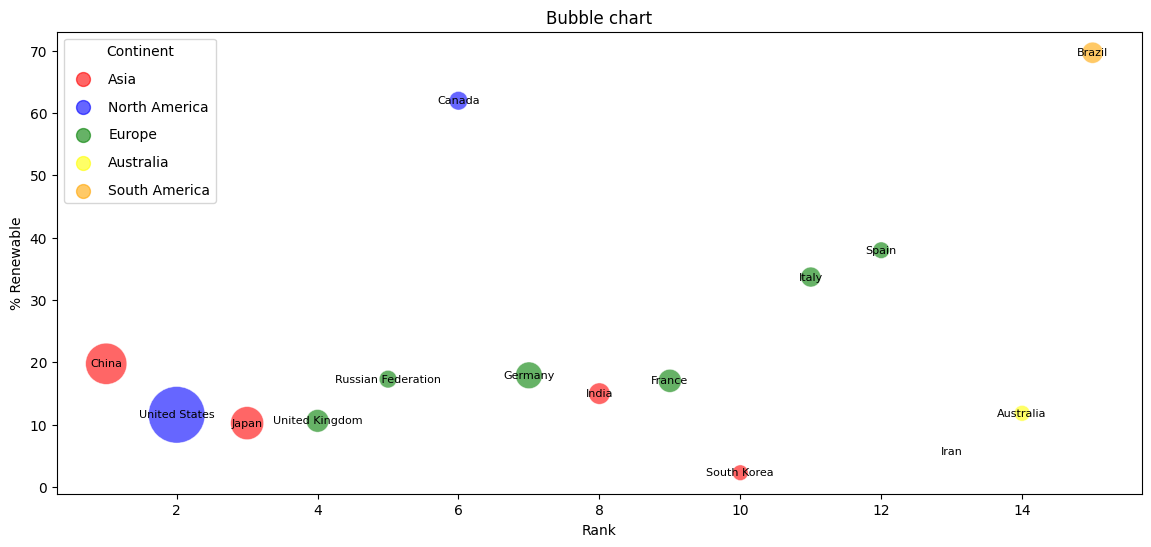

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Додаємо стовпець для континенту
ContinentDict = {
    'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia', 
    'United Kingdom': 'Europe', 'Russian Federation': 'Europe', 'Canada': 'North America', 
    'Germany': 'Europe', 'India': 'Asia', 'France': 'Europe', 'South Korea': 'Asia', 
    'Italy': 'Europe', 'Spain': 'Europe', 'Iran': 'Asia', 'Australia': 'Australia', 
    'Brazil': 'South America'
}
final_df['Continent'] = final_df.index.to_series().map(ContinentDict)

# Налаштування кольорів для континентів
continent_colors = {
    'Asia': 'red', 'North America': 'blue', 'Europe': 'green', 
    'Australia': 'yellow', 'South America': 'orange'
}

# Побудова бульбашкової діаграми
plt.figure(figsize=(14, 6))
bubble_plot = plt.scatter(
    x=final_df['Rank'],
    y=final_df['% Renewable'],
    s=final_df[2015] / 1e10,  # Масштабуємо ВВП для розміру бульбашок
    c=final_df['Continent'].map(continent_colors),  # Кольори для континентів
    alpha=0.6, edgecolors="w", linewidth=0.5
)

# Додаємо підписи для кожної країни
for i, country in enumerate(final_df.index):
    plt.text(
        final_df['Rank'][i],
        final_df['% Renewable'][i],
        country,
        ha='center', va='center', fontsize=8, color='black'
    )

# Додаємо легенду для континентів
for continent, color in continent_colors.items():
    plt.scatter([], [], c=color, alpha=0.6, s=100, label=continent)
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title="Continent")

# Додаємо підписи осей і заголовок
plt.xlabel('Rank')
plt.ylabel('% Renewable')
plt.title('Bubble chart')

# Показуємо графік
plt.show()